In [41]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [42]:
print(os.getcwd())

c:\Users\Gyanprakash\Desktop\Data-Science\NLP\Transformers\fine-Tuning\hateSpeechRecognition


In [43]:
df = pd.read_csv('data/labeled_data.csv')
df.drop(labels=['Unnamed: 0'],axis=True,inplace=True)
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [44]:
df['tweet'][232]

'"@ShanTaughtHer: These catfish hoes thinkin they slick.. But niggas catching on &#128524;"'

### Visualizing

In [45]:
df['count'].value_counts()

count
3    22807
6     1571
4      211
9      167
7       27
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e91ddda990>,
 [Text(-1.1625505852853404, 0.29744938502661705, '3'),
  Text(1.050275116840713, -0.3269895700863053, '6'),
  Text(1.0968304413054228, -0.08344449068543457, '4'),
  Text(1.0995683730581578, -0.03081222111818892, '9'),
  Text(1.0999935573694215, -0.0037648035493960024, '7')],
 [Text(-0.6781545080831151, 0.17351214126552658, '92.0%'),
  Text(0.5728773364585706, -0.1783579473198029, '6.3%'),
  Text(0.5982711498029578, -0.04551517673750976, '0.9%'),
  Text(0.5997645671226314, -0.016806666064466683, '0.7%'),
  Text(0.5999964858378661, -0.0020535292087614557, '0.1%')])

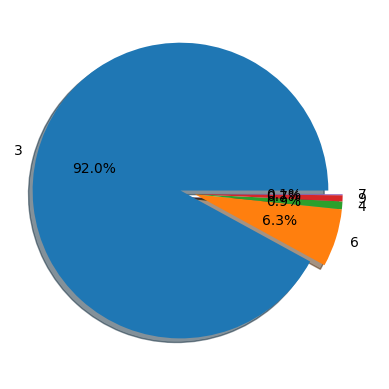

In [46]:
plt.pie(x=df['count'].value_counts(),labels=df['count'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x1e91de47250>,
 [Text(-0.8869258148630488, 0.6506631993047687, '0'),
  Text(0.7403647224161434, -0.813547833751444, '1'),
  Text(1.0683483779857166, -0.2619766082215899, '2'),
  Text(1.0988611380248077, -0.05004197576859784, '3'),
  Text(1.0999770114762542, -0.007111555650403079, '4'),
  Text(1.0999953242748852, -0.0032072688366101207, '5'),
  Text(1.099998930400089, -0.001533987829287803, '6'),
  Text(1.0999999204032127, -0.00041846496351013296, '7')],
 [Text(-0.48377771719802654, 0.3549071996207829, '79.9%'),
  Text(0.4038353031360781, -0.44375336386442393, '13.8%'),
  Text(0.5827354789013, -0.14289633175723085, '5.0%'),
  Text(0.5993788025589859, -0.02729562314650791, '1.2%'),
  Text(0.5999874608052295, -0.0038790303547653155, '0.1%'),
  Text(0.5999974496044828, -0.001749419365423702, '0.0%'),
  Text(0.5999994165818666, -0.0008367206341569833, '0.0%'),
  Text(0.5999999565835705, -0.0002282536164600725, '0.0%')])

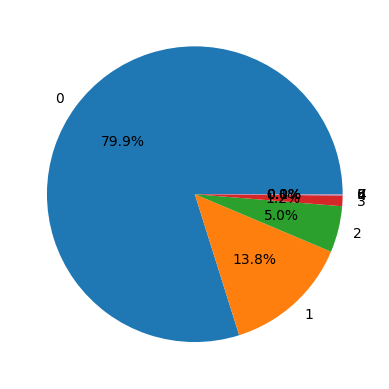

In [47]:
plt.pie(x=df['hate_speech'].value_counts(),labels=df['hate_speech'].value_counts().index,autopct='%1.1f%%'
        # explode=[0.1,0,0,0,0]
        )

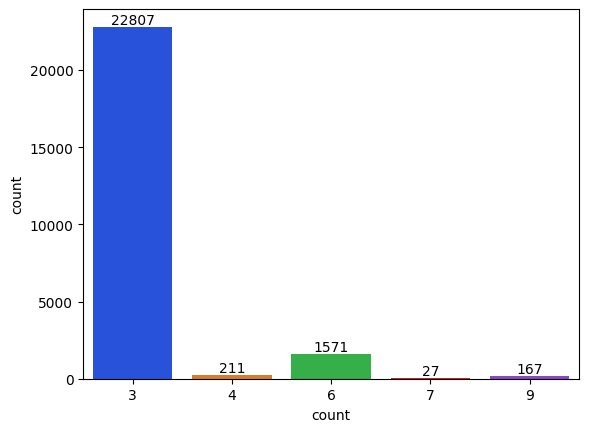

In [48]:
ax = sns.countplot(data=df,x=df['count'],palette='bright',saturation=0.7)
for i in ax.containers:
    ax.bar_label(i)

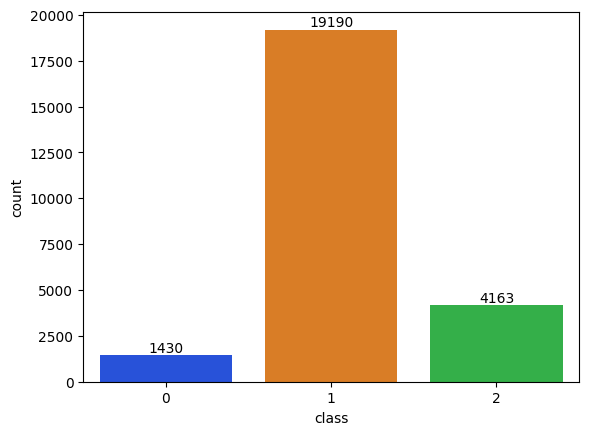

In [49]:
ax = sns.countplot(data=df,x=df['class'],palette='bright',saturation=0.7)
for i in ax.containers:
    ax.bar_label(i)

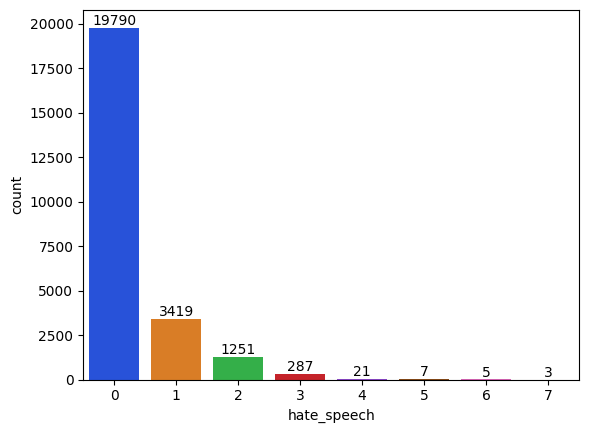

In [50]:
ax = sns.countplot(data=df,x=df['hate_speech'],palette='bright',saturation=0.7)
for i in ax.containers:
    ax.bar_label(i)

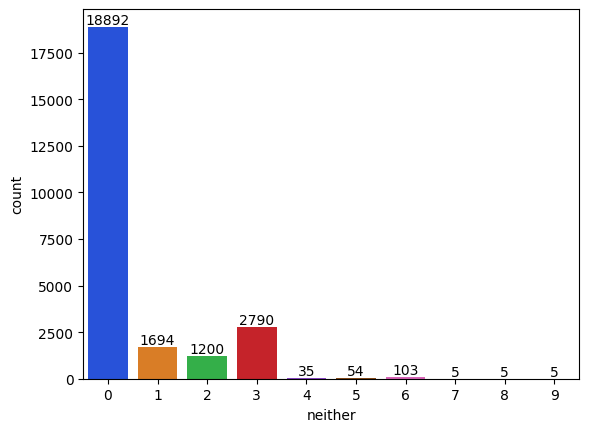

In [51]:
ax = sns.countplot(data=df,x=df['neither'],palette='bright',saturation=0.7)
for i in ax.containers:
    ax.bar_label(i)

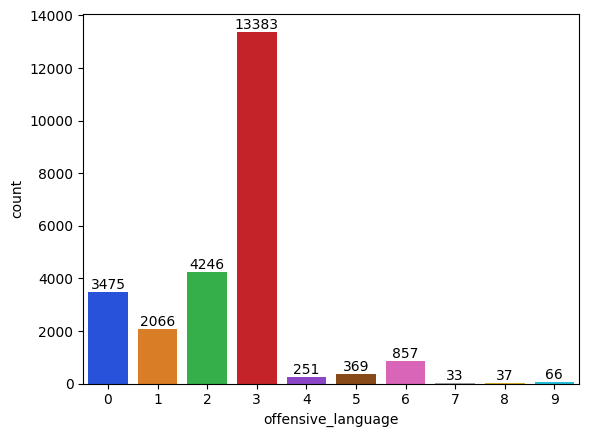

In [52]:
ax = sns.countplot(data=df,x=df['offensive_language'],palette='bright',saturation=0.7)
for i in ax.containers:
    ax.bar_label(i)

## Cleaning text

In [57]:
import string
from nltk.corpus import stopwords
from nltk import SnowballStemmer

In [58]:
stopword = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

In [59]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [61]:
df['tweet'] = df['tweet'].apply(func=clean_text)

In [67]:
df['tweet'].sample(20)

17348    rt smoothor nigga claim love pussi much yall y...
21782                                  hoe bust nut get rt
18692            rt brittanyaflor got nigga amp got bitch 
8928                             eat pussi like cold pizza
14168    rt  im done wast time im go cut bitch faster b...
21650          old bytch sorri phuck sack  pussi get ripe 
4104                                   dont fw nigga pussi
13562    oh whitney cant b true gtsob sob weep soblt oh...
6945                       rowboyquest promot that hoe ya 
8333         realli take dick nahcan bring anoth bitch nah
8983     everi nigga tryna fuck next nigga bitch know b...
26                                                hoe hit 
22689            bitch know feel stupid keep sentenc short
24077                               ima groovi type nigguh
15867    rt joshyohetrib wrote whole game stori orpik s...
4976     thesicthem averaicon lrishgiri oakridgestar iz...
20558        rule number one never pursu bitch da ova si